# Intro to Probability

La probabilidad y la estadística están estrechamente relacionadas y son dos
ramas de las matemáticas que se complementan entre si. Ahora que tenemos una
base estadística vamos a introducirnos a la probabilidad, la cual es
fundamental en el análisis de datos y la toma de decisiones. La probabilidad
nos permite medir la incertidumbre y vamos a presentarla con varios ejemplos en
las siguientes 3 secciones:

1. definición de probabilidad
2. distribuciones de probabilidad
3. probabilidad condicionada

En este notebook también vamos a presentar la librería ``matplotlib`` para 
crear visualizaciones. La complejidad de ``matplotlib`` es mayor que ``seaborn``
o ``plotly``, pero nos permite un grado de personalización mayor que con las
otras librerías y es ampliamente utilizada en el campo del análisis de datos.

In [1]:
!pip install matplotlib

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random

random.seed(777)

In [3]:
def dado6():
    return random.randint(1, 6)

def moneda():
    x = random.random()
    
    if x >= 0.5:
        return "cara"
    else:
        return "cruz"

def moneda2():
    x = random.random()
    
    if x >= 0.3:
        return "cara"
    else:
        return "cruz"

In [4]:
moneda2()

'cruz'

# 1. Definición de Probabilidad

Definir la probabilidad matemáticamente de forma rigurosa nos requeriría varios
días y seguramente no daría más dolores de cabeza que alegrías para el objetivo
que buscamos, que es introducirnos al concepto de probabilidad y sobre todo
adquirir un conocimiento práctico que nos ayude a resolver problema reales.

En la práctica, la probabilidad de un suceso $A$, que podemos denotar como
$P(A)$, puede medirse como:

<div style="background-color: #f2f2f2; border-radius: 5px; padding: 15px;">
<font color='black' size=4>

$$ \text{P(A)} = \frac{\text{número de casos en los que A SI se cumple}}{\text{número total de casos}} $$

</font>
</div>

Cuando tenemos datos, la probabilidad de un suceso puede reducirse a un conteo.
Exitos (casos en los que se cumple $A$) dividido por casos en los que no se
cumple $A$. Vamos a ver varios ejemplos en esta sección.

## 1.1. Moneda

Supongamos que tenemos una $moneda$, ¿cómo podemos conocer la probabilidad de
que esta moneda salga cara? pues usando los datos. Si lanzamos varias veces la
moneda podremos calcular la $P(cara)$ como:

<div style="background-color: #f2f2f2; border-radius: 5px; padding: 15px;">
<font color='black' size=4>

$$ \text{P(cara)} = \frac{\text{número de casos en los que sale cara}}{\text{número total de lanzamientos}} $$

</font>
</div>

In [5]:
# TODO: lanzar la moneda 10 veces (usar range())
# [numero for numero in range(10)]
# [numero for numero in range(10) if numero != 9]

# _ is just for convention when we don't care about the variable itself.
p_caras = [moneda() for _ in range(10)]

In [6]:
# TODO: calcular probabilidad de cara (P(cara))

p_caras.count('cara') / 10

0.4

Si no tuvieramos más datos, la mejor estimación que podemos hacer de $P(cara)$
es 0.4. En la vida real no podemos recopilar más datos siempre, tenemos
claramente una limitación y como en todo análisis habría un sesgo en nuestra
estimación, pero en este ejercicio si podemos lanzar más veces la moneda, vamos
a ver qué pasa:

In [7]:
# TODO: lanzar la moneda [10, 20, 50, 100, 200, 1000] veces

lista_n_lanzamientos = [10, 20, 50, 100, 200, 1000, 10000, 1000000]

# TODO iterar sobre el n de lanzamientos
for lanzamiento in lista_n_lanzamientos:

    # TODO lanzar moneda n veces y guardar en una lista
    resultado = [moneda() for _ in range(lanzamiento)]
    p_caras = resultado.count('cara') / lanzamiento

    # TODO: calcular el % de caras y de cruces e imprimir el resultado
    print(f'La probabilidad de caras es {p_caras} en {lanzamiento} tiradas.')

La probabilidad de caras es 0.7 en 10 tiradas.
La probabilidad de caras es 0.55 en 20 tiradas.
La probabilidad de caras es 0.58 en 50 tiradas.
La probabilidad de caras es 0.44 en 100 tiradas.
La probabilidad de caras es 0.595 en 200 tiradas.
La probabilidad de caras es 0.498 en 1000 tiradas.
La probabilidad de caras es 0.498 en 10000 tiradas.
La probabilidad de caras es 0.500488 en 1000000 tiradas.


Cuando hemos vuelto a lanzar 10 veces la moneda, ahora la $P(cara)$ es 0.7.
Entonces, ¿con qué estimación nos quedamos, 0.4 o 0.7? Y, por otro lado, cuando
lanzamos más de 10 veces la moneda parece que la $P(cara)$ se acerca cada vez
mas a 0.5. ¿cómo interpretamos toda esta información?

<div style="text-align:center; color:red; font-size:larger; font-weight:bold; border: 2px solid red; padding: 10px;">
    DISCUTIR la importancia de la cantidad de datos con la que contamos para
    hacer análisis y estimaciones.
</div>

Para ilustrar cómo mejora la precisión de nuestras estimaciones cuantos más
datos tengamos, vamos a realizar el siguiente experimento:
1. lanzar X lanzamientos 100 veces.
2. pintar el histograma de la P(cara) cada una de las 100 veces.

In [8]:
# TODO: lanzar la moneda [10, 20, 50, 100, 200, 1000] veces
lanzamientos = [10, 20, 50, 100, 200, 1000, 100000]

# TODO: repetir el experimento 100 veces
repeticiones = 100

# TODO: inicializar placeholder para guardar las p_caras de cada número de lanzamientos
df_placeholder = pd.DataFrame()

# TODO: iterar sobre el n de lanzamientos
for lanzamiento in lanzamientos:

    # TODO: inicializar lista placeholder para guardar las p_cara de cada repetición
    p_cara = []

    # TODO: iterar sobre el r de repeteciones
    for r in range(repeticiones):

        # TODO lanzar moneda n veces y guardar en una lista
        x = [moneda() for _ in range(lanzamiento)]

        # TODO: calcular el % de caras y de cruces e imprimir el resultado
        x_caras = x.count('cara') / lanzamiento

        # TODO: guardar p_cara en la lista p_caras
        p_cara.append(x_caras)

    # TODO: agregar columna de n_lanazamientos con sus p_caras al df
    df_placeholder[f'lanzamientos_{lanzamiento}'] = p_cara

df_placeholder

,lanzamientos_10,lanzamientos_20,lanzamientos_50,lanzamientos_100,lanzamientos_200,lanzamientos_1000,lanzamientos_100000
0,0.5,0.30,0.44,0.47,0.535,0.490,0.50025
1,0.7,0.65,0.52,0.53,0.500,0.508,0.50332
2,0.6,0.50,0.62,0.46,0.505,0.500,0.50146
3,0.4,0.60,0.52,0.51,0.485,0.516,0.50025
4,0.5,0.35,0.60,0.43,0.435,0.507,0.49990
...,...,...,...,...,...,...,...
95,0.3,0.60,0.40,0.39,0.530,0.493,0.49766
96,0.4,0.40,0.46,0.45,0.510,0.505,0.50099
97,0.6,0.65,0.46,0.46,0.480,0.496,0.49944
98,0.2,0.55,0.52,0.63,0.470,0.505,0.49808


Matplotlib nos permite un grado de personalización muy alto en comparación con
otras librerías. La filosofía de esta librería es trabajar como un artista
pintando sobre un lienzo (ahora veremos concretamente a qué nos referimos) y
los elementos que podemos personalizar vienen reflejados en la siguiente imagen
que nos servirá de referencia:

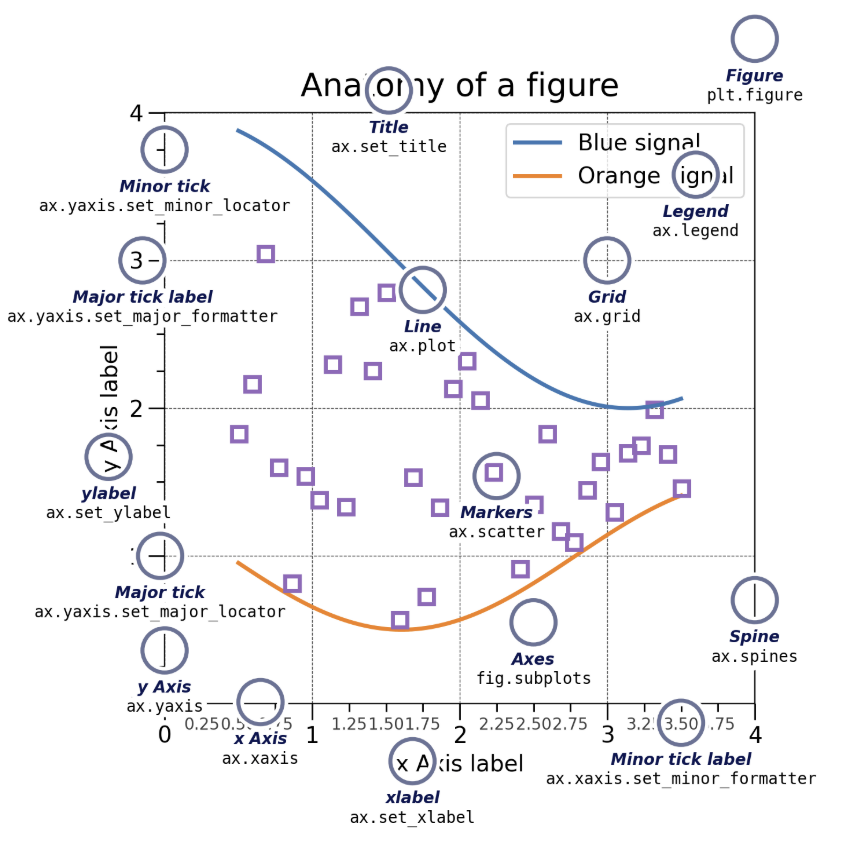

In [9]:
df_placeholder.lanzamientos_10.median()

0.5

In [10]:
np.linspace(0, 1, 11)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

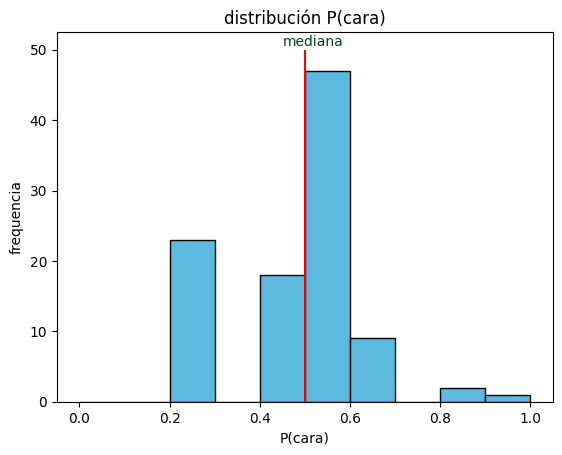

In [11]:
# TODO: calcular la mediana de df["lanzamientos_10"]
mediana_10 = df_placeholder.lanzamientos_10.median()


# TODO: inicializar layout
fig, ax = plt.subplots()


# TODO: pintar histograma (.hist()) sobre ax
ax.hist(
    df_placeholder.lanzamientos_10,
    bins = np.linspace(0, 1, 11),
    edgecolor = 'black',
    color= "#5db9dd"
)

# TODO: agregar linea vertical en la mediana de la distribución
ax.vlines(mediana_10, ymin = 0, ymax = 50, colors = 'r')

# TODO: agregar texto con información de la mediana
ax.annotate('mediana', xy = (mediana_10 - 0.05, 50.5), color= "#004514")

# TODO: agregar título y labels en ejes
ax.set_title('distribución P(cara)')
ax.set_xlabel('P(cara)')
ax.set_ylabel('frequencia')

# TODO: mostrar plot
plt.show()

Como vemos matplotlib nos permite visualizar datos al igual que otra librerías
pero con una sintaxis mucho más declarativa. La base de todo es crear los
objetos ``fig`` y ``ax``, siendo ``ax`` el lienzo sobre el que vamos a ir 
añadiendo todo lo que queramos, desde plots a títulos u otros elementos.

Entre las muchas ventajas de esta librería, una de las mas importantes es la
posibilidad de unificar varios plots en una única visualización mediante un
grid. Vamos a ver la distribución de $P(cara)$ en cada experimento.

In [12]:
# TODO: calcular medianas
df_medianas = df_placeholder

Text(0.500255, 60, '0.5003')

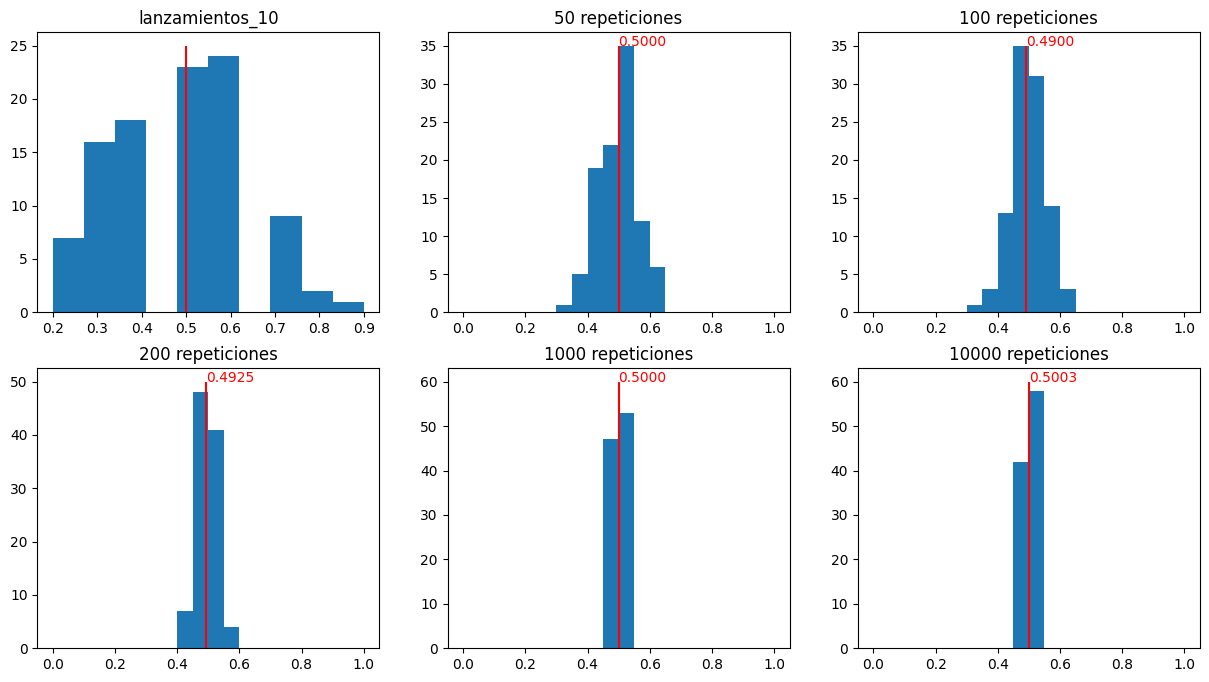

In [13]:
# TODO: crear la malla de 6 axes
df_medians = df_placeholder.median()
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (15,8))

# TODO: pintar en la malla
axes[0,0].hist(df_placeholder['lanzamientos_10'])
axes[0,0].set_title('lanzamientos_10')
axes[0,0].vlines(df_placeholder['lanzamientos_10'].median(), ymin=0, ymax=25, colors='r')
axes[0, 0].annotate(f"{df_medians['lanzamientos_10']:.4f}", xy=(df_medians["lanzamientos_10"], 35), color='r')

# axes[0, 1].hist(df_placeholder["lanzamientos_50"], bins=np.linspace(0.0, 1.0, 21),)
# axes[0, 1].set_title("50 repeticiones")
# axes[0, 1].vlines(df_placeholder["lanzamientos_50"].median(), ymin=0, ymax=35, colors='r')
# axes[0, 1].annotate(f"{df_medians['lanzamientos_50']:.4f}", xy=(df_medians["lanzamientos_50"], 35), color='r')

axes[0, 1].hist(df_placeholder["lanzamientos_50"], bins=np.linspace(0.0, 1.0, 21),)
axes[0, 1].set_title("50 repeticiones")
axes[0, 1].vlines(df_placeholder["lanzamientos_50"].median(), ymin=0, ymax=35, colors='r')
axes[0, 1].annotate(f"{df_medians['lanzamientos_50']:.4f}", xy=(df_medians["lanzamientos_50"], 35), color='r')

axes[0, 2].hist(df_placeholder["lanzamientos_100"], bins=np.linspace(0.0, 1.0, 21),)
axes[0, 2].set_title("100 repeticiones")
axes[0, 2].vlines(df_placeholder["lanzamientos_100"].median(), ymin=0, ymax=35, colors='r')
axes[0, 2].annotate(f"{df_medians['lanzamientos_100']:.4f}", xy=(df_medians["lanzamientos_100"], 35), color='r')

axes[1, 0].hist(df_placeholder["lanzamientos_200"], bins=np.linspace(0.0, 1.0, 21),)
axes[1, 0].set_title("200 repeticiones")
axes[1, 0].vlines(df_placeholder["lanzamientos_200"].median(), ymin=0, ymax=50, colors='r')
axes[1, 0].annotate(f"{df_medians['lanzamientos_200']:.4f}", xy=(df_medians["lanzamientos_200"], 50), color='r')

axes[1, 1].hist(df_placeholder["lanzamientos_1000"], bins=np.linspace(0.0, 1.0, 21),)
axes[1, 1].set_title("1000 repeticiones")
axes[1, 1].vlines(df_placeholder["lanzamientos_1000"].median(), ymin=0, ymax=60, colors='r')
axes[1, 1].annotate(f"{df_medians['lanzamientos_1000']:.4f}", xy=(df_medians["lanzamientos_1000"], 60), color='r')

axes[1, 2].hist(df_placeholder["lanzamientos_100000"], bins=np.linspace(0.0, 1.0, 21),)
axes[1, 2].set_title("10000 repeticiones")
axes[1, 2].vlines(df_placeholder["lanzamientos_100000"].median(), ymin=0, ymax=60, colors='r')
axes[1, 2].annotate(f"{df_medians['lanzamientos_100000']:.4f}", xy=(df_medians["lanzamientos_100000"], 60), color='r')

Cuantas más repeticiones realicemos (más datos tengamos) mas concentradas son
las distribuciones, es decir, más precisas son las estimaciones que hagamos con
los datos, en este caso: estimar $P(cara)$ de la $moneda$.

## 1.2. Dados

Vamos a dar un paso mas y dejar las monedas a un lado para trabajar con
``dados``. Confío en que todos habremos jugado al *monopoly* alguna vez en
nuestra vida. En este juego, como en tantos otros, si un jugador saca dobles
tres veces seguida va a la cárcel.

<div style="text-align:center; color:red; font-size:larger; font-weight:bold; border: 2px solid red; padding: 10px;">
    ¿cómo podríamos calcular la probabilidad de sacar dobles 3 veces seguidas?
</div>

Al igual que con las monedas, vamos a responder esta pregunta de forma empírica
usando datos. Aprovechando la función $dado6$ que simula un dado de 6 caras
vamos a lanzar varias veces los dos dados y calcular la probabilidad que
estamos buscando:

<div style="background-color: #f2f2f2; border-radius: 5px; padding: 15px;">
<font color='black' size=4>

$$ \text{P(ir a la cárcel)} = \frac{\text{sacar 3 dobles seguidos}}{\text{número total de casos}} $$

</font>
</div>

In [14]:
# TODO: simular el experimento 10_000 veces
n_simulaciones = 10_000

# TODO: inicializar df placeholder
df_resultados = pd.DataFrame()

# TODO: iterar sobre las simulaciones
for tirada in range(n_simulaciones):

    # TODO: crear diccionario de tiradas
    tiradas = {
        "tirada1_dado1": dado6(),
        "tirada1_dado2": dado6(),
        "tirada2_dado1": dado6(),
        "tirada2_dado2": dado6(),
        "tirada3_dado1": dado6(),
        "tirada3_dado2": dado6()
    }

    # TODO: guardar en placeholder
    df_resultados.loc[tirada, tiradas.keys()] = tiradas


# TODO: analizar resultados
df_resultados

,tirada1_dado1,tirada1_dado2,tirada2_dado1,tirada2_dado2,tirada3_dado1,tirada3_dado2
0,4,3,5,2,6,4
1,5,1,5,2,3,1
2,1,3,3,3,2,5
3,5,4,3,5,1,2
4,3,1,2,2,3,6
...,...,...,...,...,...,...
9995,3,5,4,3,2,5
9996,1,5,3,6,5,2
9997,4,4,3,5,3,5
9998,2,4,5,1,2,1


In [15]:
# TODO: seleccionar casos de éxito

exitos = (
    df_resultados
    .query('tirada1_dado1 == tirada1_dado2')
    .query('tirada2_dado1 == tirada2_dado2')
    .query('tirada3_dado1 == tirada3_dado2')
)

exitos.shape[0]

# TODO: calcular probabilidad

exitos.shape[0] / n_simulaciones

0.0034

<div style="text-align:center; color:red; font-size:larger; font-weight:bold; border: 2px solid red; padding: 10px;">
    ¿cómo cambia la estimación de esta probabilidad si cambiamos el número de simulaciones? ¿qué pasa con 100 simulaciones? ¿y con 20.000?
</div>

# 2. Distribuciones de Probabilidad

En el mundo de la estadística y el análisis de datos, comprender las
distribuciones de probabilidad es fundamental. Las distribuciones de
probabilidad son herramientas matemáticas que describen la variabilidad y la
incertidumbre asociadas con diferentes resultados en un experimento o proceso.

Existen numerosas distribuciones de probabilidad y se dividen en dos grupos:

- **distribuciones discretas**: para variables categóricas.
- **distribuciones continuas**: para variables continuas.

Vamos a visitar las principales distribuciones en la siquientes secciones.

## 2.1. Distribuciones discretas

### 2.1.1. Distribución Uniforme

Formalmente, una distribución de probabilidad es una función que describe la
probabilidad de ocurrencia de cada uno de los posibles resultados. Por ejemplo, 
la distribución de probabilidad de una moneda equilibrada es la siguiente:


<div style="background-color: #f2f2f2; border-radius: 5px; padding: 15px;">
<font color='black' size=4>

$$ p(x)= \left\{ \begin{array}{lcc} 0.5 & si & x = \text{cara} \\ \\ 0.5 & si & x = \text{cruz} \end{array} \right.$$

</font>
</div>

Sea cara o sea cruz, la probabilidad de obtener ambos resultados es la misma,
$0.5$.

Una variable aleatoria tiene una ``distribución uniforme`` cuando todos los
eventos tienen igual probabilidad de ocurrir dentro de un rango determinado.
Por ejemplo, un dado sigue una distribución uniforme, porque cada lado del dado
tiene la misma probabilidad de ocurrir: $1/6$. Y una moneda equilibrada
también, tanto la cara como la cruz tienen un $0.5$ de probabilidad de ocurrir.

Vamos a construir la función de distribución de un dado de forma empírica:

In [16]:
# TODO: lanzar el dado 1_000_000 de veces y guadar en lista

# TODO: crear una pd.Series y contar los resultados relativos

In [17]:
# TODO: iniciar figura y ejes

# TODO: pintar un barplot

# TODO: agregar labels

# TODO: mostrar plot

Formalmente podríamos describir la función de probabilidad como sigue:

$ p(x) = \left\{ \begin{array}{lcc} 
    1/6 & si & x = \text{1} \\ \\ 
    1/6 & si & x = \text{2} \\ \\ 
    1/6 & si & x = \text{3} \\ \\ 
    1/6 & si & x = \text{4} \\ \\ 
    1/6 & si & x = \text{5} \\ \\ 
    1/6 & si & x = \text{6}
    \end{array} \right.$

O lo que es lo mismo:

$ p(x) = 1/6 $

La función de distribución de una variable aleatoria nos ayuda a entender de
forma visual cómo se comporta la probabilidad de cada uno de los resultados de
la variable.

### 2.1.2. Distribución Bernoulli

La ``distribución de Bernoulli`` sirve para describir variables aleatorias que
solo pueden tomar 2 posibles resultados, por ejemplo: una moneda, si llueve o
no llueve, si un cliente se da de baja o no, etc. Todas estas situaciones
pueden describirse con una distribución de probabilidad como la siguiente:

<div style="background-color: #f2f2f2; border-radius: 5px; padding: 15px;">
<font color='black' size=4>

$$ P(x, p)= \left\{ \begin{array}{lcc} p & si & x = \text{A} \\ \\ 1-p & si & x = \text{B} \end{array} \right.$$

</font>
</div>

Como vemos, la función de distribución depende de un valor $p$ que es
directamente la probabilidad de que ocurra uno de los dos sucesos (y en
consecuencia el otro suceso tiene que repartirse el resto de la probabilidad
que queda, $1-p$).

Vamos a construir de nuevo de forma empírica la función de distribución de una
moneda, esta vez vamos a usar la $moneda2$:

In [18]:
# TODO: lanzar la moneda 1_000_000 de veces y guadar en lista

# TODO: crear una pd.Series y contar los resultados relativos

In [19]:
# TODO: iniciar figura y ejes

# TODO: pintar un barplot

# TODO: agregar labels

# TODO: mostrar plot

Función de distribución:

$ p(x) = \left\{ \begin{array}{lcc} 
    0.7 & si & x = \text{cara} \\ \\ 
    0.3 & si & x = \text{cruz}
    \end{array} \right.$

Esta $moneda2$ como vemos está trucada. Una distribución de Bernoulli no tiene
por que asignar la misma probabilidad a los dos resultados, aunque puede darse
el caso si, por ejemplo, la moneda estuviera equilibrada y tanto la cara como la
cruz tuvieran un $0.5$ de probabilidad de ocurrir. En tal caso, la distribución
de Bernoulli de una moneda equilibrada es un caso particular de la distribución
uniforme.

### 2.1.3. Distribución Binomial

La distribución Binomial sirve para describir el número de éxitos en un
<span style="background-color: #fff3b0; color: #000; font-weight: 600; padding: 2px 4px; border-radius: 4px;">
número fijo de ensayos independientes</span>, donde cada ensayo tiene dos resultados
posibles (éxito o fracaso) y la probabilidad de éxito es constante para cada
ensayo. Por ejemplo, el número de caras que obtenemos al lanzar 10 veces una
moneda sigue una distribución binomial.

Vamos a construir empíricamente esta distribución usando la $moneda$.

In [20]:
# TODO: iniciar lista placeholder para guardar resultados

# TODO: simular 10 lanzamientos 1_000_000 de veces

    # TODO: lanzar la moneda 10 veces

    # TODO: contar caras

    # TODO: guardar resultado en lista

# TODO: crear una pd.Series y contar los resultados relativos

In [21]:
# TODO: iniciar figura y ejes

# TODO: pintar un barplot

# TODO: agregar labels

# TODO: mostrar plot

Matemáticamente la distribución de $x$ exitos en $n$ tiradas donde la
probabilidad de éxito es $p$ es la siguiente:


<div style="background-color: #f2f2f2; border-radius: 5px; padding: 15px;">
<font color='black' size=4>

$$ P(x) = \binom{n}{x} p^x (1-p)^{n-x} $$

</font>
</div>

Por ejemplo, si lanzamos monedas equilibradas ($p=0.5$), la probabilidad de
obtener 5 caras en 10 lanzamientos es:

$ 
    P(5) = 
    \binom{10}{5} 0.5^5 (1-0.5)^{10-5} = 
    \frac{10!}{5!(10 - 5)!} 0.5^5 0.5^5 \approx 
    0.25 
$

A efectos prácticos la probabilidad de cada posibilidad la tenemos
representada en la distribución de probabilidad anterior, donde vemos que 
$ P(\text{5 caras en 10 tiradas}) \approx 0.25, por ejemplo.$

### 2.1.4. Distribución de Poisson

Como hemos visto, todo suceso aleatorio tiene una distribución de probabilidad,
que no es más que una función que describe la probabilidad que tiene cada
resultado. El lanzamiento de una moneda sigue una distribución de Bernoulli

$ p(x) = \left\{ \begin{array}{lcc} 
    p & si & x = \text{cara} \\ \\ 
    1-p & si & x = \text{cruz}
    \end{array} \right.
$

El número de caras que se obtiene al lanzar 10 veces una moneda con
probabilidad $p$ de salir cara sigue una distribución Binomial:

$ P(x) = \binom{n}{x} p^x (1-p)^{n-x} $

Y el número de eventos (independientes) durante un periodo de tiempo sigue una
``distribución de Poisson``:

<div style="background-color: #f2f2f2; border-radius: 5px; padding: 15px;">
<font color='black' size=4>

$$ Poisson(x) = \frac{{e^{-\lambda} \lambda^x}}{{x!}} $$

</font>
</div>

donde $\lambda$ es el número de éxitos por unidad de tiempo. Vamos con un
ejemplo.

Vamos a simular la llegada de clientes a una cola de un supermercado.
Supongamos que en un supermercado de barrio el promedio de clientes que llegan
a la cola es de 10 personas cada hora. ¿Cuál es la probabilidad de que en una
hora lleguen exactamente 5 personas?

Pues si consideramos como evento "la llegada de un cliente a la caja" y por
periodo de tiempo cogemos "una hora" y el promedio de clientes que llegan a la
caja es de 10 personas, el número de clientes que llegan durante una hora a la
caja sigue la siguiente distribución de Poisson:

$$ Poisson(x) = \frac{{e^{-10} 10^x}}{{x!}} $$

Vamos a construir la función de distribución del número de personas que llegan
a la cola en una hora con una simulación como hemos hecho hasta ahora:

In [22]:
# # TODO: repetir el experimento 1_000_000 de horas (o veces)

# lambda_ = 10  # promedio de clientes por hora
# n_sim = 1_000_000 # número de simulaciones
# n_clientes = np.random.poisson(lam=lambda_, size=n_sim)

# # TODO: contar la frecuencia de cada resultado posible
# ps_n_clientes = (
#     pd.Series(n_clientes)
#     .value_counts(normalize=True)
#     .sort_index()
# )

In [23]:
# # TODO: iniciar figura y ejes
# fig, ax = plt.subplots()

# # TODO: pintar un barplot
# ax.bar(
#     x=ps_n_clientes.index,
#     height=ps_n_clientes.values
#     )

# # TODO: agregar labels
# ax.set_title("distribución del número de clientes en 1 hora")
# ax.set_xlabel("clientes")
# ax.set_ylabel("probabilidad")

# # TODO: mostrar plot
# plt.show()

Esta visualización mapea cada posible resultado con una estimación muy
aproximada de su probabilidad. Podemos ir más allá y estimar la probabilidad
de que lleguen $x$ clientes durante varias horas, por ejemplo 6 (asumiendo que
el promedio con el que llegan los clientes es constantemente 10).

In [24]:
# # TODO: repetir el experimento 1_000_000 de veces para 6 horas

# lambda_ = 10  # promedio de clientes por hora
# n_horas = 6  # número de horas a simular
# n_sim = 1_000_000  # número de simulaciones
# n_clientes = [np.random.poisson(lam=lambda_, size=n_horas).sum() for _ in range(n_sim)]

# # TODO: contar la frecuencia de cada resultado posible
# ps_n_clientes = (
#     pd.Series(n_clientes)
#     .value_counts(normalize=True)
#     .sort_index()
# )

In [25]:
# # TODO: iniciar figura y ejes
# fig, ax = plt.subplots()

# # TODO: pintar un barplot
# ax.bar(
#     x=ps_n_clientes.index,
#     height=ps_n_clientes.values
#     )

# # TODO: agregar labels
# ax.set_title("distribución del número de clientes en 6 horas")
# ax.set_xlabel("clientes")
# ax.set_ylabel("probabilidad")

# # TODO: mostrar plot
# plt.show()

## 2.2. Distribuciones continuas

¿Y si nuestra variable aleatoria es continua y no discreta? Si eso es así, la
variable puede tomar cualquier valor en un intervalo continuo. En estos casos
la función de distribución también es continua. Vamos a ver las distribuciones
continuas más frecuentes.

### 2.2.1. Distribución Uniforme

Decimos que una variable sigue una distribución continua uniforme en un
intervalo [a, b] cuando puede tomar cualquier valor con la misma probabilidad.
Como no tenemos un número finito de valores sino un intervalo al completo, las
funciones de distribución continuas se representan mediante una curva de
densidad y no se un histograma o diagrama de barras.

[]

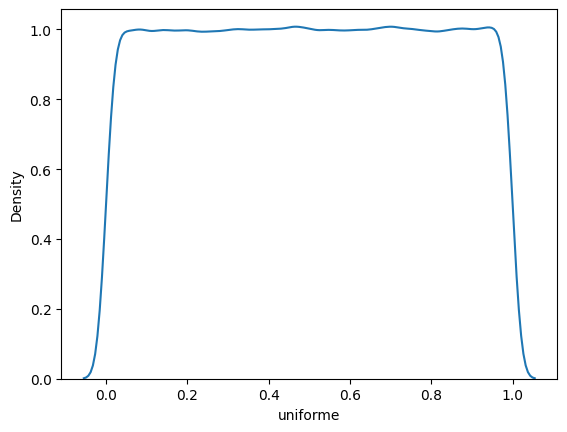

In [26]:
# TODO: simular una variable continua uniforme en un intervalo [0, 1]
a = 0
b = 1
x = np.random.uniform(a, b, size=1_000_000)
df = pd.Series(x).to_frame(name="uniforme")

# TODO: visualizar la función de densidad con seaborn kde
sns.kdeplot(df, x="uniforme").plot()

Es importante notar que cuando representamos una variable aleatoria continua
mediante una función de densidad, ésta no indica la probabilidad de cada suceso
sino la "densidad", entendiendo que cuanto mayor es la densidad más probable es
que ocurra dicho suceso. En el caso de una distribución uniforme entre 0 y 1,
todos los sucesos entre 0 y 1 son igual de probables (tienen igual densidad) y
los valores por debajo de 0 o por encima de 1 son imposibles (densidad igual a
0).

Formalmente, esta es la función de densidad que acabamos de estimar:

<div style="background-color: #f2f2f2; border-radius: 5px; padding: 15px;">
<font color='black' size=4>

$$
    f(x, a, b) = \left\{ \begin{array}{lcc} \frac{1}{b-a} & si & a \leq x \leq b \\ \\ 0 & si & x \lt a \text{ ó }  x \gt b \end{array} \right.$$

$$

### 2.2.2. Distribución Exponencial

Una variable aleatoria que sigue una distribución exponencial puede
representar, por ejemplo, el tiempo entre eventos en un proceso de Poisson.
La distribución exponencial es comúnmente utilizada para modelar el tiempo de
espera entre eventos que ocurren de manera independiente a una tasa constante.


<div style="background-color: #f2f2f2; border-radius: 5px; padding: 15px;">
<font color='black' size=4>

$$
    f(x) = \begin{cases}
       \lambda e^{-\lambda x} & \text{para } x \geq 0 \\
       0 & \text{para } x < 0
       \end{cases}

$$

</font>
</div>


Por ejemplo, supongamos que estamos interesados en modelar el tiempo que
transcurre entre las llegadas de clientes a un servicio de atención al cliente
en una tienda. Si sabemos que, en promedio, llega un cliente cada 10 minutos,
podemos modelar esta situación con una distribución exponencial.

In [27]:
# # TODO: promedio de clientes por unidad de tiempo (minutos)
# lambd = 1 / 10

# # TODO: simulamos los tiempos hasta que llega el siguiente cliente durante 1 hora (60 minutos)
# tiempos_de_llegadas = np.random.exponential(scale=1/lambd, size=60)

# # TODO: calcular la función de densidad de teórica
# x = np.linspace(0, 50, 1000)
# pdf = lambd * np.exp(-lambd * x)

# # TODO: pintar la función de densidad de probabilidad
# plt.hist(tiempos_de_llegadas, bins=30, density=True, alpha=0.5, label='Datos simulados')
# plt.plot(x, pdf, label='Función de densidad de probabilidad (teórica)')
# plt.xlabel('Tiempo')
# plt.ylabel('Densidad')
# plt.title('Distribución exponencial')
# plt.legend()
# plt.show()

### 2.2.3. Distribución Normal

Por último, la distribución mas importante de todas: ``distribución normal``.
Esta es la distribución más estudiada en teoría de probabilidad por tantas
razones que los matemáticos han llegado a dedicar libros enteros a esta
distribución. Pero principalmente esto se debe a la frecuencia con la que
aparece esta distribución en muchas situaciones reales, por ejemplo: en muchas 
poblaciones la estatura sigue una distribución normal.

Si una variable aleatoria sigue una distribución normal su función de densidad
es la siguiente:

<div style="background-color: #f2f2f2; border-radius: 5px; padding: 15px;">
<font color='black' size=4>

$$

f(x | \mu, \sigma^2) = \frac{1}{\sigma \sqrt{2\pi}} \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right)

$$

</font>
</div>

Donde $\mu$ es la media de la distribución y $\sigma$ es la desviación
típica.

Vamos a simular una distribución normal de media 0 y desviación típica 1 para
entender qué forma tiene esta distribución:

In [28]:
# # TODO: parametros de la distribucion
# mu = 0  # media
# sigma = 1  # std dev

# # TODO: generar 1000 muestras de esta distribucion
# data = np.random.normal(mu, sigma, 1000)

# # TODO: calcular función de densidad teórica
# x = np.linspace(-5, 5, 1000)
# pdf = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))

# # TODO: pintar la función de densidad de probabilidad
# plt.hist(data, bins=30, density=True, alpha=0.5, edgecolor='black')
# plt.plot(x, pdf)
# plt.xlabel('Valor')
# plt.ylabel('Densidad')
# plt.title('Distribución normal (media=0, desviación típica=1)')
# plt.show()

En una distribución normal los valores de concentran de forma simétrica en
torno a la media $\mu$ y se dispersan a ambos lados a razón de $\sigma$. Para
entender cómo influyen ambos parámetros vamos a simular varias distribuciones y
cerrar con la distribución normal esta sección.

In [29]:
# # TODO: parametros de las distribuciones
# mu00 = 0
# sigma00 = 1
# mu01 = 3
# sigma01 = 1
# mu10 = 0
# sigma10 = 4
# mu11 = 10
# sigma11 = 20

# # TODO: generar 1000 muestras de estas distribuciones
# data00 = np.random.normal(mu00, sigma00, 1000)
# data01 = np.random.normal(mu01, sigma01, 1000)
# data10 = np.random.normal(mu10, sigma10, 1000)
# data11 = np.random.normal(mu11, sigma11, 1000)

# # TODO: calcular función de densidad teórica
# x00 = np.linspace(-5, 5, 1000)
# x01 = np.linspace(-4, 7, 1000)
# x10 = np.linspace(-20, 20, 1000)
# x11 = np.linspace(-60, 80, 1000)
# pdf00 = (1 / (sigma00 * np.sqrt(2 * np.pi))) * np.exp(-((x00 - mu00) ** 2) / (2 * sigma00 ** 2))
# pdf01 = (1 / (sigma01 * np.sqrt(2 * np.pi))) * np.exp(-((x01 - mu01) ** 2) / (2 * sigma01 ** 2))
# pdf10 = (1 / (sigma10 * np.sqrt(2 * np.pi))) * np.exp(-((x10 - mu10) ** 2) / (2 * sigma10 ** 2))
# pdf11 = (1 / (sigma11 * np.sqrt(2 * np.pi))) * np.exp(-((x11 - mu11) ** 2) / (2 * sigma11 ** 2))

# # TODO: pintar la funciones de densidad de probabilidad
# fig, axes = plt.subplots(2, 2, figsize=(12, 9))
# axes[0,0].hist(data00, bins=30, density=True, alpha=0.5, edgecolor='black')
# axes[0,0].plot(x00, pdf00)
# axes[0,0].set_title(f'Distribución normal (media={mu00}, desviación típica={sigma00})')
# axes[0,1].hist(data01, bins=30, density=True, alpha=0.5, edgecolor='black')
# axes[0,1].plot(x01, pdf01)
# axes[0,1].set_title(f'Distribución normal (media={mu01}, desviación típica={sigma01})')
# axes[1,0].hist(data10, bins=30, density=True, alpha=0.5, edgecolor='black')
# axes[1,0].plot(x10, pdf10)
# axes[1,0].set_title(f'Distribución normal (media={mu10}, desviación típica={sigma10})')
# axes[1,1].hist(data11, bins=30, density=True, alpha=0.5, edgecolor='black')
# axes[1,1].plot(x11, pdf11)
# axes[1,1].set_title(f'Distribución normal (media={mu11}, desviación típica={sigma11})')
# plt.show()

# 3. Probabilidad Condicionada

Cuando estudiamos un evento $A$ solemos interesarnos por cómo cambia la
probabilidad de que ocurra, $P(A)$ varios distintas discunstancias. Esto es lo
que se denomida ``probabilidad condicionada``. Queremos calcular la
probabilidad de que ocurra $A$ condicionada a un suceso $B$. Por ejemplo, la
probabilidad de tener un accidente de coche es interesante de conocer, pero
también lo es el entender cómo cambia la probabilidad de tener un accidente
cuando llueve.

<div style="background-color: #f2f2f2; border-radius: 5px; padding: 15px;">
<font color='black' size=4>

$$ P(accidente) \neq P(accidente | lluvia) $$

</font>
</div>

Si la probabilidad de tener un accidente cuando llueve es más grande y cuánto
más grande es un dato muy importante para entender el fenómeno del accidente.

En cualquier compañía también surgen muchas preguntas que en el fondo son
probabilidades condicionadas. Vamos a ver cómo se calcula una probabilidad
condicionada y después veremos varios ejemplos con un dataset real.

La definición de probabilidad condicionada es la siguiente:

<div style="background-color: #f2f2f2; border-radius: 5px; padding: 15px;">
<font color='black' size=4>

$$ P(A | B) = \frac{P(A \cap B)}{P(B)} $$

</font>
</div>

Donde $P(A \cap B)$ es la probabilidad de que ocurran $A$ y $B$. De primeras
esta definición puede asustar un poco, pero vamos a volver al ejemplo de los
accidentes y la lluvia para ver que es mas intuitivo de lo que parece:

$$ P(accidente | lluvia) = \frac{P(\text{accidente y lluvia})}{P(lluvia)} $$

Si tuvieramos un dataset de 70 días en los que sabemos si ha habido o no
accidente y si ha llovido o no, la mejor estimación que podemos hacer para la
probabilidad condicionada que buscamos es la siguiente:

$$ \frac{P(\text{accidente y lluvia})}{P(lluvia)} = \frac{
    \frac{\text{\# días con accidente y lluvia}}{70}}{\frac{\text{\# días con lluvia}}{70}} =\frac{\text{\# días con accidente y lluvia}}{\text{\# días con lluvia}} $$

De primeras podríamos hacer los dos conteos y con ellos calcular la
probabilidad de tener un accidente cuando llueve, pero en el fondo esta
división es el porcentaje de días de días con accidente entre los días que ha
habido lluvia. Vamos con un ejemplo usando un datset real para entender bien
este cálculo y el concepto de probabilidad condicionada.

### Churn Analysis

Tenemos una muestra de clientes de una compañía de telecomunicaciones para los
que disponemos de 21 variables entre las que está si se han dado o no de baja.
El análisis de qué factores aumentan o reducen la probabilidad de que un
cliente se de de baja es importante por razones evidentes y se conoce como
"churn problem".

In [30]:
# para usar Colab

# from google.colab import drive
# drive.mount('/content/drive')

In [42]:
# TODO: leer datos en el path data/telco_churn_dataset.parquet

df = pd.read_parquet('telco_churn_dataset.parquet')

In [43]:
# TODO: analizar el dataset

df.head()

,id_cliente,casado,tiene_hijos,una_linea_movil,varias_lineas_movil,alarma_seguridad,copia_seguridad,seguro_tecnico,soporte_tecnico,television_por_cable,...,tipo_contrato,factura_online,cuota_mensual,total_pagado,baja,genero_hombre,genero_mujer,servicio_internet_adsl,servicio_internet_fibra_optica,servicio_internet_no
0,7590-VHVEG,1,0,0,0,0,1,0,0,0,...,0,1,29.85,29.85,0,0,1,1,0,0
1,5575-GNVDE,0,0,1,0,1,0,1,0,0,...,0,0,56.95,1889.50,0,1,0,1,0,0
2,3668-QPYBK,0,0,1,0,1,1,0,0,0,...,0,1,53.85,108.15,1,1,0,1,0,0
3,7795-CFOCW,0,0,0,0,1,0,1,1,0,...,0,0,42.30,1840.75,0,1,0,1,0,0
4,9237-HQITU,0,0,1,0,0,0,0,0,0,...,0,1,70.70,151.65,1,0,1,0,1,0


In [44]:
df.baja.mean()

np.float64(0.2653698707936959)

In [51]:
df.query(
    'netflix == 1'
    ).baja.mean()

np.float64(0.29941434846266474)

<div style="text-align:center; color:red; font-size:larger; font-weight:bold; border: 2px solid red; padding: 10px;">
    ¿cuál es la probabilidad de que un cliente se de de baja?
</div>

In [33]:
# TODO: calcular la probabilidad de que un cliente se de de baja

<div style="text-align:center; color:red; font-size:larger; font-weight:bold; border: 2px solid red; padding: 10px;">
    ¿cuál es la probabilidad de que un cliente se de de baja si el cliente tiene contratado netflix?
</div>

<div style="background-color: #f2f2f2; border-radius: 5px; padding: 15px;">
<font color='black' size=4>

$$ P(baja | netflix) = \frac{P(\text{baja y netflix})}{P(netflix)} = \frac{\text{\# baja y netflix}}{\text{\# netflix}} $$

</font>
</div>

Vamos a hacer ambos conteos y a calcular la probabilidad:

In [34]:
# TODO: calcular la probabilidad de que un cliente se de de baja teniendo netflix

Si nos fijamos bien, calcular probabilidades condicionadas con datos es mucho
más sencillo, pues la definición es mucho más simple que la matemática que hay
detrás y solo necesitamos hacer dos cosas:
1) filtrar por $B$
2) calcular probabilidad de $A$

In [35]:
# TODO: calcular la probabilidad de que un cliente se de de baja teniendo netflix de manera fácil

Como vemos los clientes no parecen estar muy contentos con el valor añadido de
tener netflix contratado con la compañía de telecomunicaciones, la probabilidad
aumenta de un ~0.27 a un ~0.3. Esto podría explicar una mala experiencia de
usuario si Netflix no está bien integrada en la plataforma de la compañía o un
aumento en la factura del cliente que no valora o considera desproporcionado.

In [55]:
# TODO: calcular probabilidad condicionada para cada factor del dataset
features = [
    'casado', 'tiene_hijos', 'una_linea_movil', 'varias_lineas_movil',
    'alarma_seguridad', 'copia_seguridad', 'seguro_tecnico', 'soporte_tecnico',
    'television_por_cable', 'netflix', 'tipo_contrato', 'factura_online',
    'genero_hombre', 'genero_mujer', 'servicio_internet_adsl',
    'servicio_internet_fibra_optica', 'servicio_internet_no'
    ]

for columna in features:
    prob = df[df[columna] == 1].baja.mean()
    print(f'columna - {columna}: {prob}')

columna - casado: 0.1966490299823633
columna - tiene_hijos: 0.15450236966824646
columna - una_linea_movil: 0.2670963684955196
columna - varias_lineas_movil: 0.286098956580276
columna - alarma_seguridad: 0.14611193660227836
columna - copia_seguridad: 0.21531494442157267
columna - seguro_tecnico: 0.2250206440957886
columna - soporte_tecnico: 0.15166340508806261
columna - television_por_cable: 0.30070188400443293
columna - netflix: 0.29941434846266474
columna - tipo_contrato: 0.29941434846266474
columna - factura_online: 0.33565092304003835
columna - genero_hombre: 0.2616033755274262
columna - genero_mujer: 0.26920871559633025
columna - servicio_internet_adsl: 0.1895910780669145
columna - servicio_internet_fibra_optica: 0.4189276485788114
columna - servicio_internet_no: 0.07404980340760157


<div style="text-align:center; color:red; font-size:larger; font-weight:bold; border: 2px solid red; padding: 10px;">
    DISCUTIR qué interpretabilidad podemos dar a cada una de las probabilidades
    condicionadas aneriores.
</div>

In [37]:
# TODO: pintar distirbución del total pagado (hist con bins=30)

In [38]:
# TODO: pintar distirbución de la cuota mensual (hist con bins=30)

In [39]:
# TODO: discretizamos las variables de cuota mensual
# bins_cuota_mensual = [18, 33, 65, 100, 120]
# labels_cuota_mensual = ['18_to_33', '34_to_65', '66_to_100', '101_to_120']

# TODO: discretizamos las variables de total pagado
# bins_total_pagado = [0, 1000, 2000, 4000, 6000, 10_000]
# labels_total_pagado = ['0_to_1000', '1001_to_2000', '2001_to_4000', '4001_to_6000', '6001_to_10000']

In [40]:
# TODO: crear dummies

# TODO: seleccionar nuevas variables creadas

In [41]:
# TODO: calcular probabilidades para todas estas features

<div style="text-align:center; color:red; font-size:larger; font-weight:bold; border: 2px solid red; padding: 10px;">
    DISCUTIR qué interpretabilidad podemos dar a cada una de las probabilidades
    condicionadas aneriores.
</div>